In [1]:
! kaggle datasets download -d camnugent/california-housing-prices

california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


Lets unzip downloaded dataset

In [2]:
import zipfile

def unzip_file(zip_path, extract_dir):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_dir)

unzip_file('./california-housing-prices.zip', './datasets')

In [3]:
import pandas as pd
housing_data = pd.read_csv('./datasets/housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.describe

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

In [5]:
housing_data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

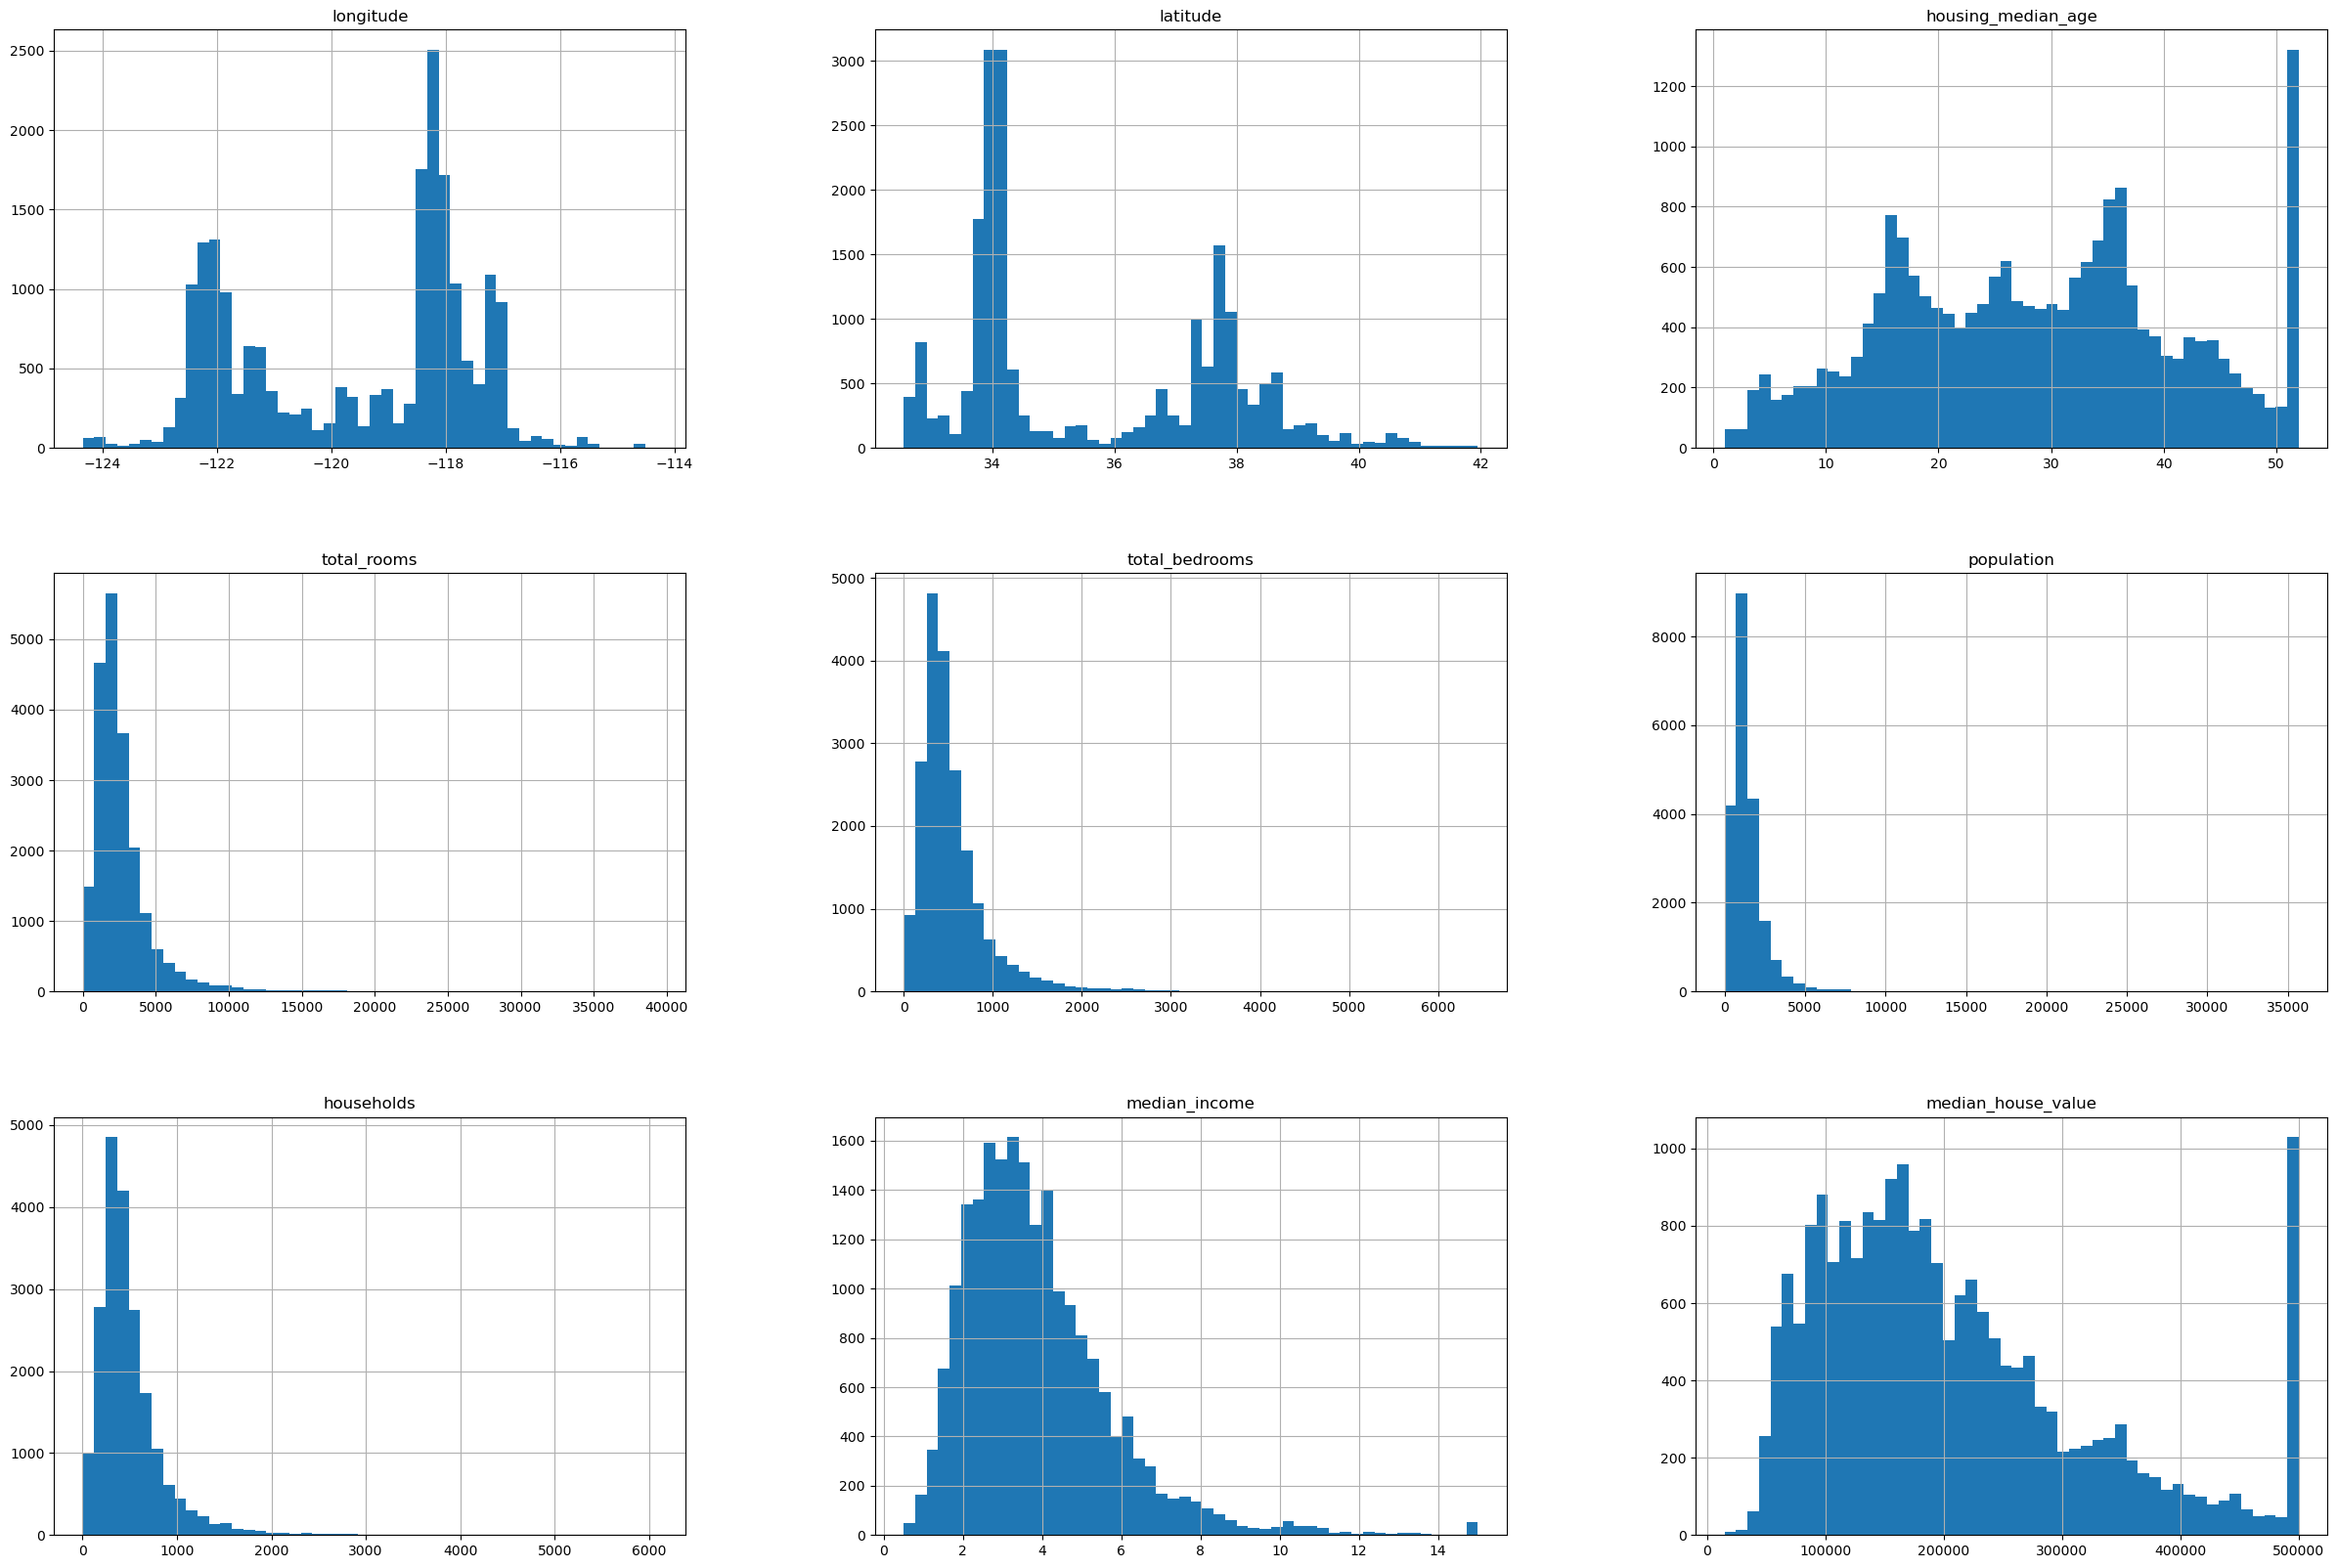

In [6]:
housing_data.hist(bins=50, figsize=(30, 20))

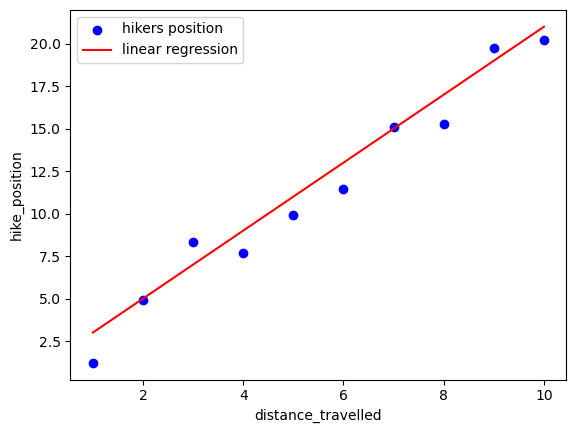

In [7]:
import matplotlib.pyplot as plt
import random

# Aniket's imaginary data points :) 
distance_travelled = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
hike_position = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

hike_position = [e + random.uniform(-2, 2) for e in hike_position]

plt.scatter(distance_travelled, hike_position, color='blue', label='hikers position')

# regression line
m = 2  # indicate how steep trail is, +ve uphill, -ve  downhill
b = 1  # acts as starting point for hikers
regression_line = [m * x + b for x in distance_travelled]

plt.plot(distance_travelled, regression_line, color='red', label='linear regression')

plt.xlabel('distance_travelled')
plt.ylabel('hike_position')
plt.legend()

plt.show()


In [8]:
colors = ["#717cb4", "#9b5b4f", "#4e4151", "#dbba78", "#a02933", "#909195","#dc1e1e","#bb9c55","#716807","#bfd3e6"]

In [9]:
housing_data.describe().T.style.bar(subset=['mean'],color=colors[3]).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20640.000000,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,39320.000000
total_bedrooms,20433.000000,537.870553,421.385070,1.000000,296.000000,435.000000,647.000000,6445.000000
population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
households,20640.000000,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6082.000000
median_income,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_value,20640.000000,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000


C:\Users\worka\AppData\Local\Temp\ipykernel_26912\1980488286.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing_data['median_house_value'],color=colors[7])


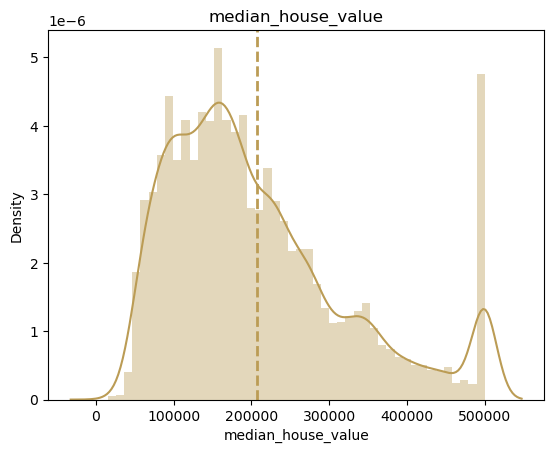

In [10]:
import seaborn as sns 

sns.distplot(housing_data['median_house_value'],color=colors[7])
plt.axvline(x=housing_data['median_house_value'].mean(), color=colors[7], linestyle='--', linewidth=2)
plt.title('median_house_value');

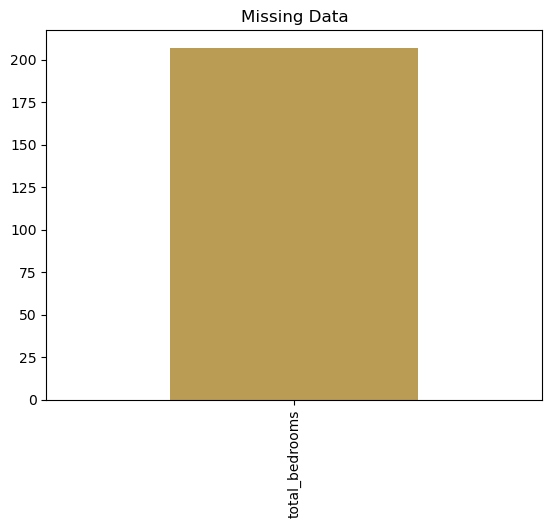

In [11]:
missing = housing_data.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color=colors[7])
plt.title('Missing Data');

C:\Users\worka\AppData\Local\Temp\ipykernel_26912\3806645495.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_data.corr(),annot=True);


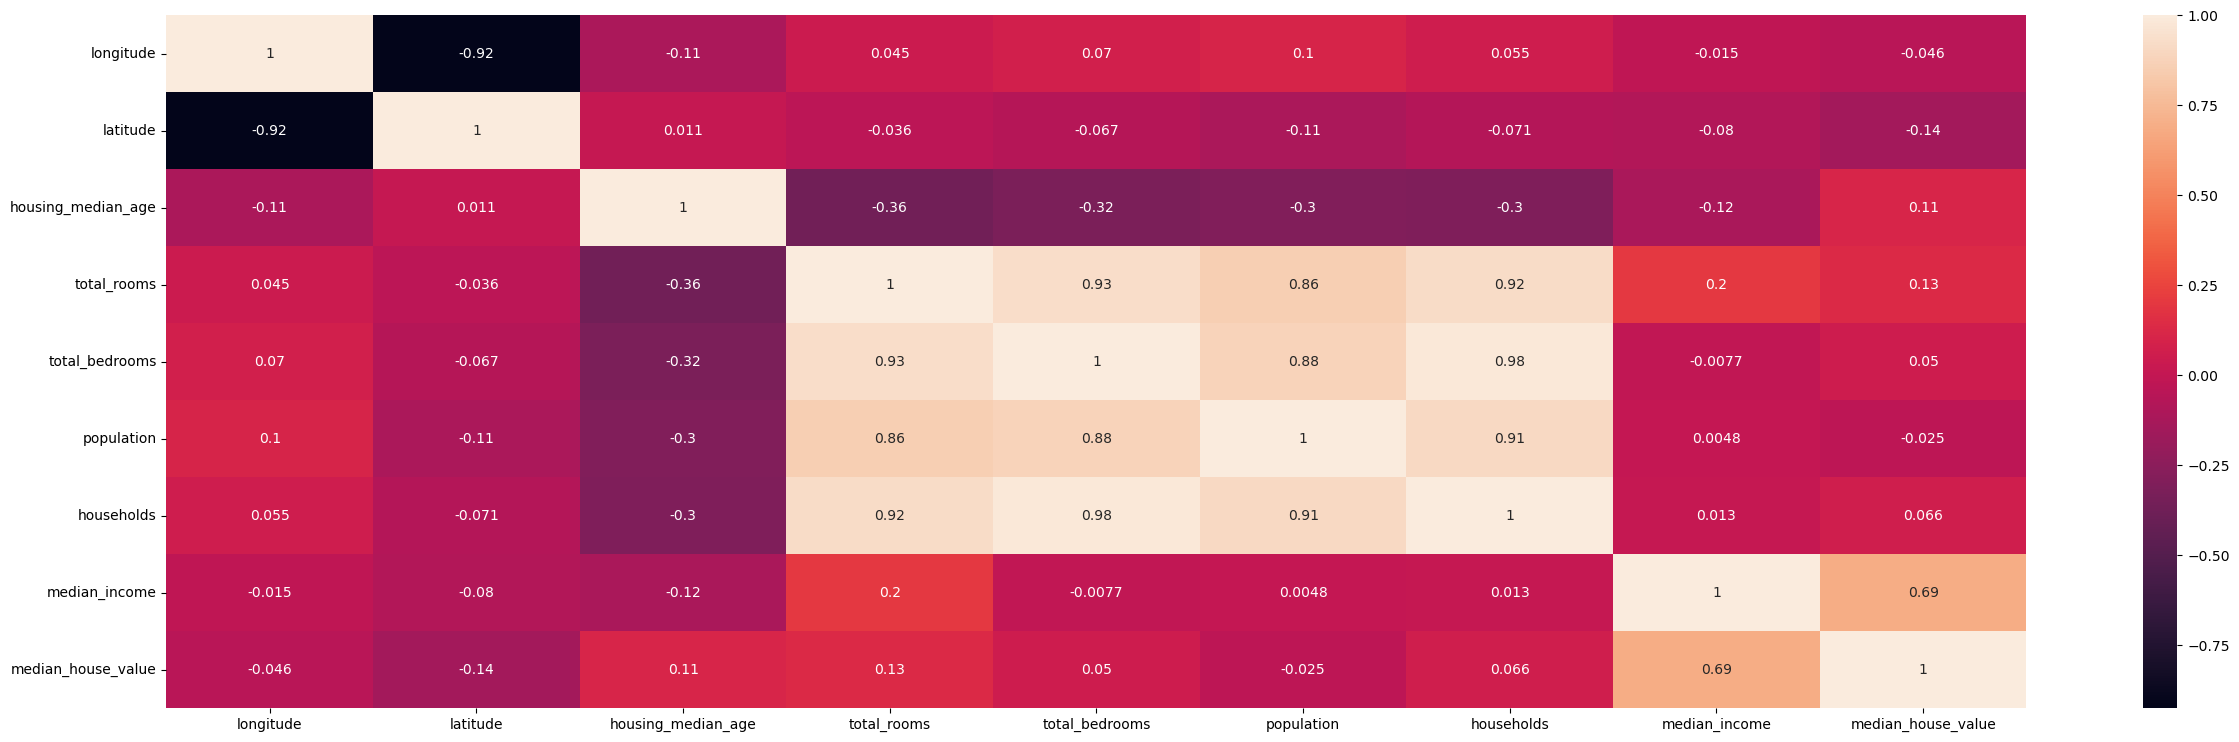

In [12]:
plt.figure(figsize=(30,9))
sns.heatmap(housing_data.corr(),annot=True);

In [16]:
dropcol = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","ocean_proximity"]
print(dropcol)
housing_median_income = housing_data.drop(dropcol,axis=1)
print(type(housing_median_income))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']
<class 'pandas.core.frame.DataFrame'>
